In [16]:
# importowanie potrzebnych bibliotek:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
#-------------------------------------------------------
from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.DataStructs.cDataStructs import ExplicitBitVect
from rdkit.Avalon import pyAvalonTools
from rdkit.Chem import PandasTools
from rdkit.Chem import rdMolDescriptors
from tqdm import tqdm
#--------------------------------------------------------
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import time
from sklearn.model_selection import ShuffleSplit, cross_validate,train_test_split
#--------------------------------------------------------
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

In [2]:
termo_database = pd.read_excel('C:/Users/mbkil/excele/Database _500.xlsx') 
termo_database.head()

# importujemy wykonaną przez nas baze danych


,Unnamed: 0,CAS,Substances,Molecular Weight [g/mol],Formula,SMILES,Critical_Temperature,Critical_Pressure,Critical_Volume
0,1,74-99-7,Propyne,40.06,C3H4,C#CC,401.10,5627.59,0.164
1,2,74-99-7,Propyne,40.06,C3H4,C#CC,402.40,5630.00,0.164
2,3,75-28-5,Isobutane,58.12,C4H10,CC(C)C,407.69,3604.00,0.259
3,4,106-98-9,1-Butene,56.11,C4H8,C=CCC,417.15,4000.00,0.241
4,5,115-11-7,2-Methylpropene,56.11,C4H8,C=C(C)C,417.88,4000.00,0.239


In [3]:
termo_baza_podstawa = termo_database[["Critical_Temperature","Critical_Pressure","Critical_Volume","SMILES"]]
termo_baza_podstawa

# wyodrębniamy interesujące nas dane

,Critical_Temperature,Critical_Pressure,Critical_Volume,SMILES
0,401.10,5627.59,0.164,C#CC
1,402.40,5630.00,0.164,C#CC
2,407.69,3604.00,0.259,CC(C)C
3,417.15,4000.00,0.241,C=CCC
4,417.88,4000.00,0.239,C=C(C)C
...,...,...,...,...
987,957.28,1793.94,0.872,CCCOC(=O)CCCC(=O)Oc1cc(C)ccc1C
988,965.52,1379.91,1.044,CCCCCCCCCCCOc1cc(Cl)c(Cl)cc1Cl
989,966.58,1616.77,0.946,CCCCCOC(=O)CCCC(=O)OCc1ccccc1F
990,968.16,1155.35,1.141,CCCCCCCCCCCOC(=O)CC(=O)OCCC(C)C


In [4]:
# tworzymy struktury 2d dla naszych SMILESÓW
PandasTools.AddMoleculeColumnToFrame(termo_baza_podstawa,'SMILES','Stucture',includeFingerprints=True)

C:\Users\mbkil\anaconda3\lib\site-packages\rdkit\Chem\PandasTools.py:381: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame[molCol] = frame[smilesCol].map(


,Critical_Temperature,Critical_Pressure,Critical_Volume,SMILES,Stucture
0,401.10,5627.59,0.164,C#CC,
1,402.40,5630.00,0.164,C#CC,
2,407.69,3604.00,0.259,CC(C)C,
3,417.15,4000.00,0.241,C=CCC,
4,417.88,4000.00,0.239,C=C(C)C,
...,...,...,...,...,...
987,957.28,1793.94,0.872,CCCOC(=O)CCCC(=O)Oc1cc(C)ccc1C,
988,965.52,1379.91,1.044,CCCCCCCCCCCOc1cc(Cl)c(Cl)cc1Cl,
989,966.58,1616.77,0.946,CCCCCOC(=O)CCCC(=O)OCc1ccccc1F,
990,968.16,1155.35,1.141,CCCCCCCCCCCOC(=O)CC(=O)OCCC(C)C,

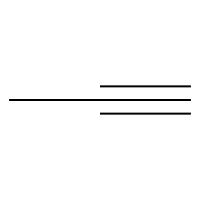
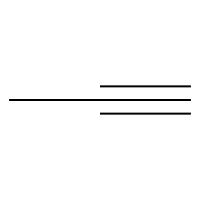
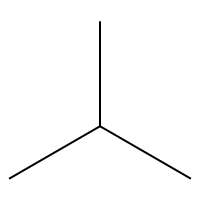
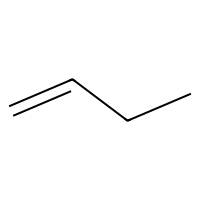
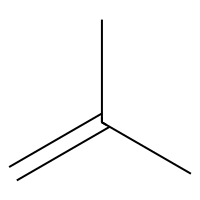
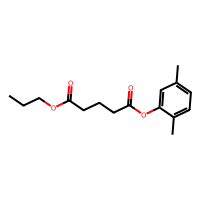
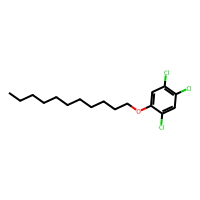
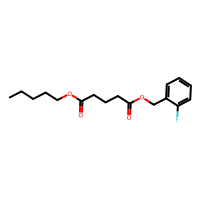
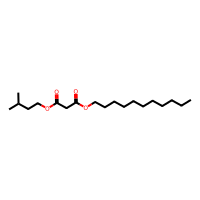
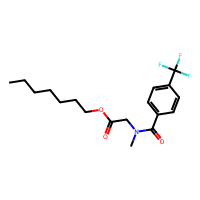

In [5]:
termo_baza_podstawa

In [6]:
def generate_AVfpts(data):
    
    Avalon_fpts = []
    
    for mol in tqdm(data):
      
        avfpts = pyAvalonTools.GetAvalonFP(mol, nBits=4096)
        Avalon_fpts.append(avfpts)
        
    return np.array(Avalon_fpts)

# Tworzymy fingerprinty

In [7]:
Avalon_fpts = generate_AVfpts(termo_baza_podstawa['Stucture'])

100%|██████████| 992/992 [00:00<00:00, 1657.67it/s]


In [8]:
Avalon_fpts

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [10]:
# Przchowujemy fingerprinty w nowej bazie

Avalon_fingerprints = pd.DataFrame(Avalon_fpts, columns=['Col_A_{}'.format(i + 1) 
                                                        for i in range(Avalon_fpts.shape[1])])
Avalon_fingerprints

Avalon_fingerprints.to_excel("Avalon_fingerprints.xlsx", index=False)

In [11]:
Avalon_fingerprints

,Col_A_1,Col_A_2,Col_A_3,Col_A_4,Col_A_5,Col_A_6,Col_A_7,Col_A_8,Col_A_9,Col_A_10,...,Col_A_4087,Col_A_4088,Col_A_4089,Col_A_4090,Col_A_4091,Col_A_4092,Col_A_4093,Col_A_4094,Col_A_4095,Col_A_4096
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
988,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
989,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
990,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


[0]	validation_0-rmse:579.72725
[1]	validation_0-rmse:523.99236
[2]	validation_0-rmse:474.49661
[3]	validation_0-rmse:429.11107
[4]	validation_0-rmse:389.25036
[5]	validation_0-rmse:352.33647
[6]	validation_0-rmse:320.12530
[7]	validation_0-rmse:291.24274
[8]	validation_0-rmse:265.48259
[9]	validation_0-rmse:242.98508
[10]	validation_0-rmse:221.52541
[11]	validation_0-rmse:202.96541
[12]	validation_0-rmse:186.27148
[13]	validation_0-rmse:171.26646
[14]	validation_0-rmse:158.39054
[15]	validation_0-rmse:146.90585
[16]	validation_0-rmse:136.89203
[17]	validation_0-rmse:128.28774
[18]	validation_0-rmse:120.33985
[19]	validation_0-rmse:113.46416
[20]	validation_0-rmse:107.32616
[21]	validation_0-rmse:101.96165
[22]	validation_0-rmse:97.14890
[23]	validation_0-rmse:93.14950
[24]	validation_0-rmse:89.62818
[25]	validation_0-rmse:86.46359
[26]	validation_0-rmse:83.39015
[27]	validation_0-rmse:80.77969
[28]	validation_0-rmse:78.71271
[29]	validation_0-rmse:76.74066
[30]	validation_0-rmse:75.12

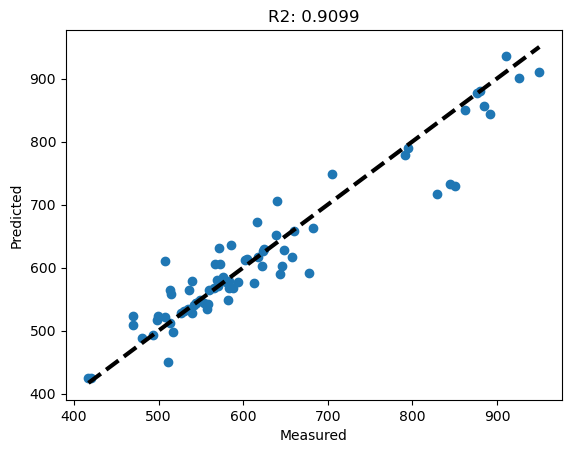

In [80]:
# Pobranie kolumny TC i przekształcenie do tablicy numpy
y = termo_baza_podstawa["Critical_Temperature"].values

# Wczytanie danych z arkusza "finger" i przekształcenie do tablicy numpy
X = Avalon_fingerprints.values

# Podział danych na zbiór treningowy, walidujący i testowy
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.15, random_state=24)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=24)

# Tworzenie modelu XGBoost z early stopping
model = xgb.XGBRegressor(
    n_estimators=1000,  # Liczba drzew decyzyjnych
    max_depth=13,  # Maksymalna głębokość drzewa
    learning_rate=0.1,  # Współczynnik uczenia
    objective='reg:squarederror',  # Funkcja celu dla regresji
    random_state=24,
    early_stopping_rounds=300  # Wczesne zatrzymanie, jeśli nie ma poprawy przez 10 kolejnych rund
)

# Trenowanie modelu
model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    verbose=True
)

# Predykcja na zbiorze testowym
y_pred = model.predict(X_test)

# Obliczenie błędu MEA
mea = mean_absolute_error(y_test, y_pred)
print(f"MEA: {mea:.4f}")

# Obliczenie współczynnika R2
r2 = r2_score(y_test, y_pred)
print(f"R2: {r2:.4f}")

# Wykres R2 dla zbioru testowego
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title(f"R2: {r2:.4f}")
plt.show()